# Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Importing dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Assessing dataset

In [3]:
print(f"There is {df.duplicated().sum()} duplicate rows in the dataset.")
print(f"There is {df.isna().sum().sum()} missing values in the dataset.")

There is 0 duplicate rows in the dataset.
There is 0 missing values in the dataset.


## Notes
Since our dataset does not contains any duplicated rows nor missing values, we can move on to the exploratory data analysis.

# EDA
Let's gather some more detailed information about our dataset

In [4]:
print("Descriptive statitics - Numerical variables")
df.describe(include=np.number)

Descriptive statitics - Numerical variables


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
print("Descriptive statitics - Categorical variables")
df.describe(include=object)

Descriptive statitics - Categorical variables


,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [6]:
print("Occurence of Each Species of Flower")
df.value_counts(subset='Species')

Occurence of Each Species of Flower


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Notes

We need to remove the `Id` columns as it is irrelevant in this settings. Expect from that, our dataset is balanced, i.e there is the same number of entries (here `50`) for each of the 3 species of flowers. Also, the quantitaive entries are all in the same unit (`cm`) and range. This means that we might not need feature scaling during the preprocessing part. 

Let's a have a visual representation of our dataset

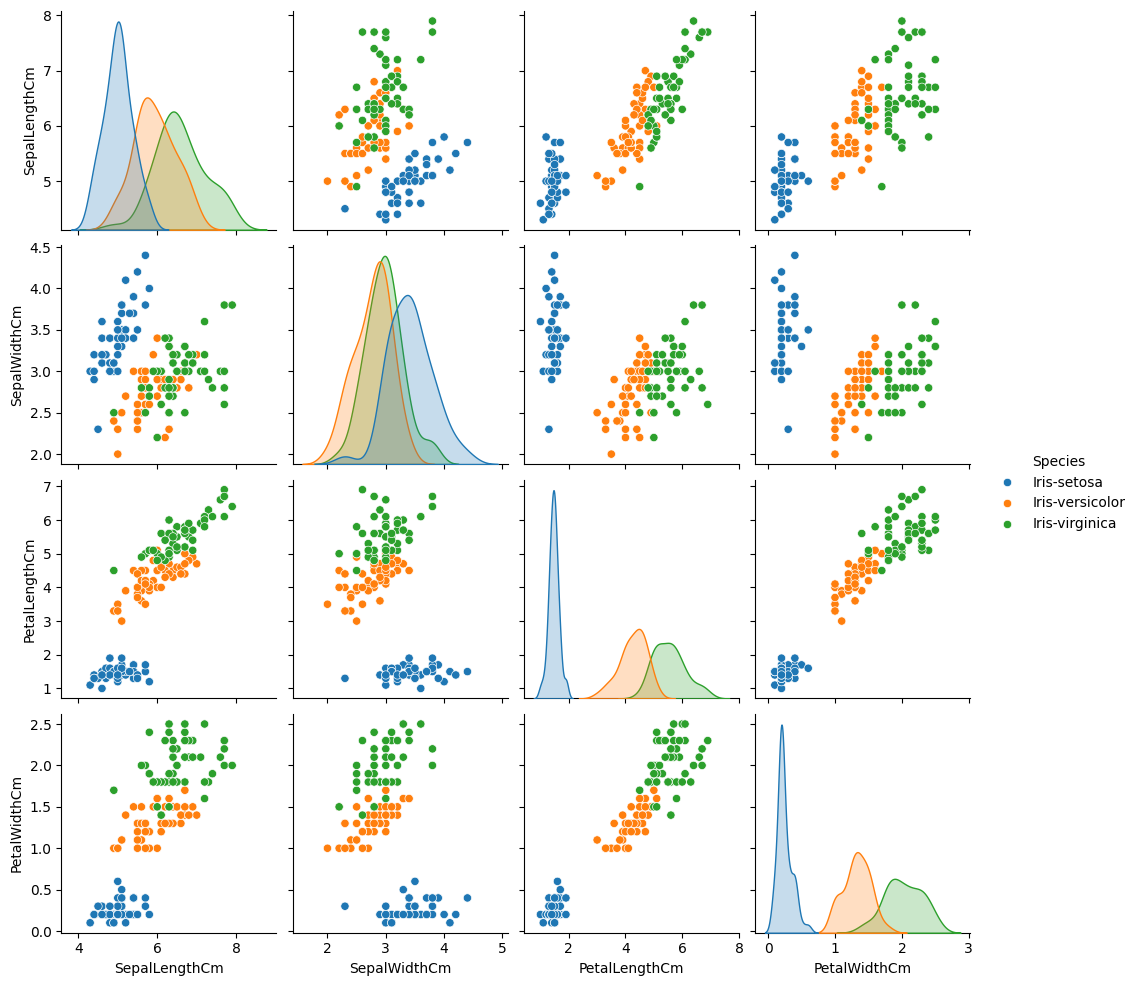

In [7]:
# first we remove id
df.drop('Id', axis=1, inplace=True, errors='ignore')
# then we plot a scatter of each quant. features
sns.pairplot(df, hue='Species');

## Notes

- Based on the features in the dataset, the `iris-setosa` specie is the most different one, compared to the others:
  - extremely low (with regard to others) `petal width` and `petal length`
  - higher occurence of `shorter sepal`
- `iris-versicolr` and `iris-virginica` differs most in terms of `petal length` and `petal width`.
- We can expect our model to be more accurate when classifying a new observation into the `iris-setosa` class.

# Preprocessing
Before running the model, we need to setup a few thing. The first one is to split the dataset into two parts the feature (X) and the target (y) and each of them further down into two parts: the training set and the testing set.

- The training set will be used to train our Decision Tree (DT).
- The test set will be used to evaluate the performance of our DT.

We'll use `70%` of our database for training and perform testing on the rest.

In [8]:
# feature, target splitting
X, y = df.select_dtypes(exclude=object), df.select_dtypes(include=object)
# trainning and testing splitting
## setting variable
TRAIN_PERCENT = 0.7
RANDOM_STATE = 42
## splittinh
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=TRAIN_PERCENT, 
    random_state=RANDOM_STATE
)
print(f"Training set has {len(X_train)} rows\nTesting set has {len(X_test)} rows.")

Training set has 105 rows
Testing set has 45 rows.


# Modelling

Now that we have our training and testing set we can create and fit our Decision Tree Classifier

In [9]:
# instanciating the model
dtc = DecisionTreeClassifier()
# fitting to the train set
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluating

Let's see how well our model is performing on the train set

In [10]:
# let's build a function for that
def performances(
    X: np.typing.ArrayLike,
    y: np.typing.ArrayLike,
    is_train: bool=True,
    clf: DecisionTreeClassifier=dtc
) -> None:
    # predict the target
    y_hat = dtc.predict(X)
    # print a metrics report
    print(f"{'Classification report - Train' if is_train else 'Classification report - Test':*^75}")
    print(metrics.classification_report(y_true=y, y_pred=y_hat))

In [11]:
# checking the performance of the DT on the train set
performances(X_train, y_train, is_train=True)

***********************Classification report - Train***********************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



The different metrics shown here describe the performance of our model. For a better understanding of the output, you can refer to this [article](https://lifewithdata.com/2023/06/07/how-to-interpret-the-classification-report-in-sklearn/).

One thing that is worrying here is that all the metrics are maxed out to one. This is usually a sign that the might be some overfitting (DT are prone to overfitting). Let's llok at the performances on the test set to conclude. We would normally expect similary performances. Similar performances confirm that there is no overfitting and the model is well generalizable. 

In [12]:
# checking the performance of the DT on the test set
performances(X_test, y_test, is_train=False)

***********************Classification report - Test************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



As we can see here the accuracy of the model is the same (with a precision of 2 digits). This imply that the modely is capable of generalizing and predict accurately on unknown values.

Now let's visualize the tree

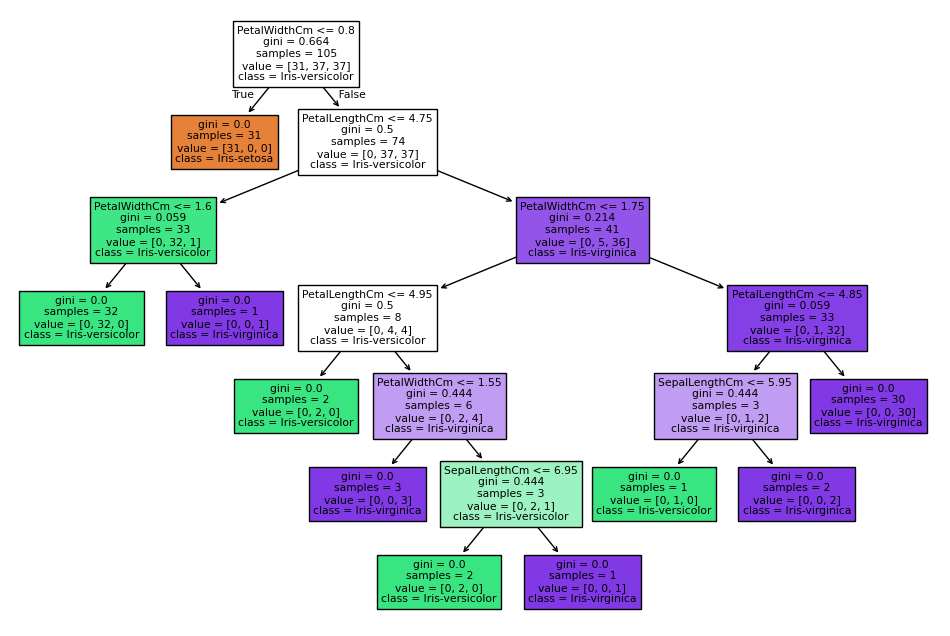

In [13]:
plt.figure(figsize=(12,8))
plot_tree(dtc, 
          feature_names=dtc.feature_names_in_,
          class_names=dtc.classes_,
          filled=True
)
plt.show()